In [14]:
from DLtools.Data import instant_data,station_sel
from DLtools.feature_sel import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading Data 

In [15]:
###### SETTING AREA ################
loading = instant_data()
df,mode = loading.hourly_instant(),'hour'
# df,mode = loading.daily_instant(),'day'
if mode =='hour': n_past,n_future = 24*7,72
elif mode =='day': n_past,n_future = 60,30

st = 'CPY012'
target,start_p,stop_p,host_path=station_sel(st,mode)

save_path = host_path

<AxesSubplot:xlabel='date'>

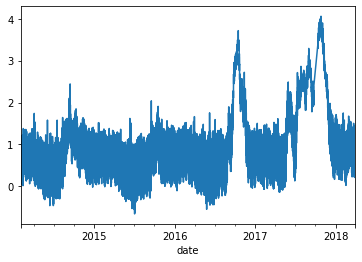

In [16]:
df = df[start_p:stop_p]
data = df

data['Day'] = data.index.dayofyear #add day
data = data.interpolate(limit=300000000,limit_direction='both').astype('float32')#interpolate neighbor first, for rest NA fill with mean() #.apply(lambda x: x.fillna(x.mean()),axis=0)
data[target].plot()


In [17]:
data = call_mar(data,target,mode,cutoff=0.2)

# Check Corr

<AxesSubplot:>

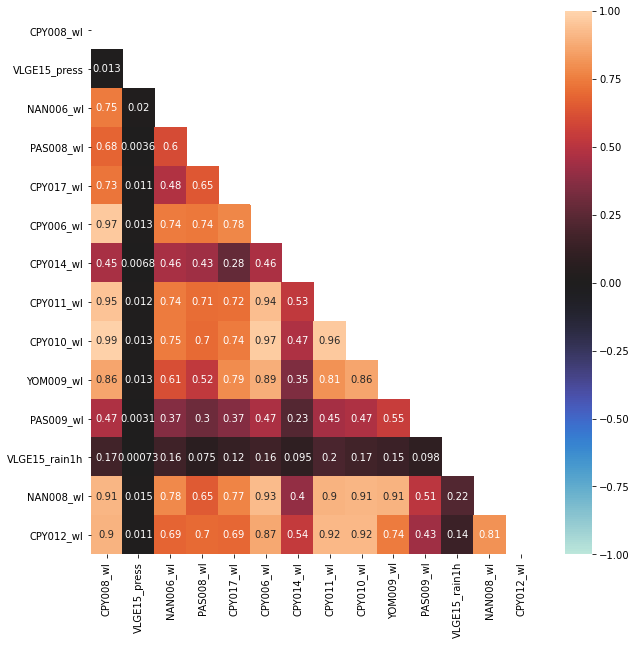

In [18]:
plt.subplots(figsize=(10,10))
mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0,mask=mask)

# PCA analysis

In [21]:
x = scale(data)
covar_matrix = PCA(n_components = data.shape[1])
covar_matrix.fit(x.T)

PCA(n_components=14)

In [61]:
PC_transform = covar_matrix.transform(x.T)
####################
pc_col = []
for i in range (PC_transform.shape[1]):
  pc_col.append('component_'+str(i+1))
#########################
principalDf = pd.DataFrame(data = PC_transform, columns = pc_col)

finalDf = pd.concat([principalDf, pd.Series(data.columns.T)],axis=1)
finalDf.set_index(0).to_csv('MAR/pca_hour.csv')

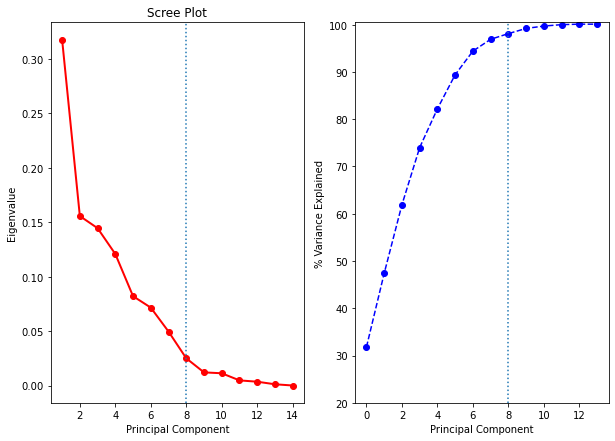

In [63]:
fig,ax = plt.subplots(1,2, figsize=(10,7))
##########################################
PC_values = np.arange(covar_matrix.n_components_) + 1
ax[0].plot(PC_values, covar_matrix.explained_variance_ratio_, 'ro-', linewidth=2)
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].axvline(8,linestyle=':')

########################################
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
ax[1].set_ylabel('% Variance Explained')
ax[1].set_xlabel('Principal Component')
# ax[1].set_title('PCA Analysis')
ax[1].set_ylim(20,100.5)
ax[1].plot(var,'--bo')
ax[1].axvline(8,linestyle=':')
plt.savefig('MAR/PCA_analysis.png', dpi=300, bbox_inches='tight')

In [58]:
# pca = PCA(n_components = 8 )

# split_date = '2017-01-01'
# train,test = data[:split_date],data[split_date:]

# pca.fit(data)
# train_pca = pca.transform(train)
# test_pca = pca.transform(test)